In [157]:
#We need to import the necesary libraries for the practice
import pandas as pd
import tensorflow as tf
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import optimizers
from numpy.random import seed
from numpy import array
from numpy import argmax
from keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

## Obtain the data
We get the data from csv file and put in a  dataframe

In [158]:
#put a seed of 10 for replicate the experiment with random values
seed(10)
# read the dataset of the assignment
def read_data_set(name):
    #delete the header
    return pd.read_csv(name, header=None).iloc[1: , :]

csv_file = 'assignment_ds.csv'
csv_file_test='test_ds.csv'

df=read_data_set(csv_file)
test_df=read_data_set(csv_file_test)

#show the first 10 rows
df[0:10]

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,Red,M,0
2,12098,689,7.01,0.02,Blue-white,A,3
3,2731,0.000437,0.0856,18.09,Red,M,0
4,37800,202900,6.86,-4.56,Blue,O,3
5,8570,0.00081,0.0097,14.2,Blue white,A,2
6,3605,126000,1124,-10.81,Red,M,5
7,8052,8.7,1.8,2.42,Whitish,A,3
8,3574,200000,89,-5.24,Red,M,4
9,8829,537493,1423,-10.73,White,A,5
10,3625,74000,876,-10.25,Red,M,5


## We look the classifications by colors.

In [159]:
df.groupby(4).apply(list)

4
Blue                  [0, 1, 2, 3, 4, 5, 6]
Blue White            [0, 1, 2, 3, 4, 5, 6]
Blue white            [0, 1, 2, 3, 4, 5, 6]
Blue-White            [0, 1, 2, 3, 4, 5, 6]
Blue-white            [0, 1, 2, 3, 4, 5, 6]
Orange                [0, 1, 2, 3, 4, 5, 6]
Orange-Red            [0, 1, 2, 3, 4, 5, 6]
Pale yellow orange    [0, 1, 2, 3, 4, 5, 6]
Red                   [0, 1, 2, 3, 4, 5, 6]
White                 [0, 1, 2, 3, 4, 5, 6]
White-Yellow          [0, 1, 2, 3, 4, 5, 6]
Whitish               [0, 1, 2, 3, 4, 5, 6]
Yellowish             [0, 1, 2, 3, 4, 5, 6]
Yellowish White       [0, 1, 2, 3, 4, 5, 6]
white                 [0, 1, 2, 3, 4, 5, 6]
yellow-white          [0, 1, 2, 3, 4, 5, 6]
yellowish             [0, 1, 2, 3, 4, 5, 6]
dtype: object

## We clean the data  first converting the colors to lower case

In [160]:
# column to lower case
def to_lower_case(datafra):
    return datafra[4].map(lambda x: x if type(x)!=str else x.lower())

df[4] = to_lower_case(df)
test_df[4] = to_lower_case(test_df)
df

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,red,M,0
2,12098,689,7.01,0.02,blue-white,A,3
3,2731,0.000437,0.0856,18.09,red,M,0
4,37800,202900,6.86,-4.56,blue,O,3
5,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
196,13420,0.00059,0.00981,13.67,blue white,B,2
197,19860,0.0011,0.0131,11.34,blue,B,2
198,13023,998,6.21,-1.38,blue-white,A,3
199,39000,204000,10.6,-4.7,blue,O,3


## We replace the similar colors.

In [161]:
def change_colors(datafr):
    datafr[4] = datafr[4].replace(['blue-white'], 'blue white')
    datafr[4] = datafr[4].replace(['orange-red'], 'orange red')
    datafr[4] = datafr[4].replace(['yellow-white'], 'yellow white')
    datafr[4] = datafr[4].replace(['white-yellow'], 'white yellow')
    
change_colors(df)
change_colors(test_df)
df

,0,1,2,3,4,5,6
1,3453,0.000621,0.0773,17.08,red,M,0
2,12098,689,7.01,0.02,blue white,A,3
3,2731,0.000437,0.0856,18.09,red,M,0
4,37800,202900,6.86,-4.56,blue,O,3
5,8570,0.00081,0.0097,14.2,blue white,A,2
...,...,...,...,...,...,...,...
196,13420,0.00059,0.00981,13.67,blue white,B,2
197,19860,0.0011,0.0131,11.34,blue,B,2
198,13023,998,6.21,-1.38,blue white,A,3
199,39000,204000,10.6,-4.7,blue,O,3


## We Normalize the data

In [162]:
def normalize(datafr):
    # scale input data
    inputs_numbers = datafr[[0,1,2,3]]
    x = inputs_numbers.values #returns a numpy array
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

inputs_numbers=normalize(df)
test_inputs_numbers=normalize(test_df)
inputs_numbers

,0,1,2,3
0,0.039778,6.369052e-10,3.536069e-05,0.906817
1,0.266914,8.111416e-04,3.593344e-03,0.373358
2,0.020809,4.202868e-10,3.962039e-05,0.938399
3,0.942198,2.388689e-01,3.516361e-03,0.230144
4,0.174220,8.594100e-10,6.671828e-07,0.816760
...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188
196,0.470849,1.200819e-09,2.412122e-06,0.727330
197,0.291217,1.174919e-03,3.182770e-03,0.329581
198,0.973726,2.401639e-01,5.435795e-03,0.225766


## We make the one hot encoding to the colors and the type of the spectrum

In [163]:
def one_hot_encode(dataframe):    
    #we use get dummies for hot encoding that is a function of pandas
    one_hot_colors = pd.get_dummies(dataframe[[4]]).reset_index(drop=True)
    one_hot_spectrum = pd.get_dummies(dataframe[[5]]).reset_index(drop=True)
    return one_hot_colors,one_hot_spectrum

one_hot_colors,one_hot_spectrum=one_hot_encode(df)
test_one_hot_colors,test_one_hot_spectrum=one_hot_encode(test_df)
one_hot_spectrum

,5_A,5_B,5_F,5_G,5_K,5_M,5_O
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
195,0,1,0,0,0,0,0
196,0,1,0,0,0,0,0
197,1,0,0,0,0,0,0
198,0,0,0,0,0,0,1


## Transform target to one hot encode

In [164]:
#one_hot_target = pd.get_dummies(df[[6]]).reset_index(drop=True)

#we use the label encoder to one hot encode the target classficiation
target=df[[6]]
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
target = pd.DataFrame(onehot_encoded)

#we rename his columns for adding them in the data frame

target = target.rename(columns = {
   0: 23,
   1: 24,
   2: 25,
   3: 26,
   4: 27,
   5: 28,
    
}, inplace = False)
target

C:\Users\Dani Camacho\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,23,24,25,26,27,28
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,0.0,0.0,1.0,0.0,0.0,0.0
196,0.0,0.0,1.0,0.0,0.0,0.0
197,0.0,0.0,0.0,1.0,0.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0


## We move the target column to the last and join the rest

In [165]:
#We concatenate the dataframes to have the new dataframe with all clean data
#new_df= pd.concat([inputs_numbers, one_hot_colors, one_hot_spectrum, one_hot_target], axis=1,)
new_df= pd.concat([inputs_numbers, one_hot_colors, one_hot_spectrum, target], axis=1,)
test_new_df=pd.concat([test_inputs_numbers, test_one_hot_colors, test_one_hot_spectrum], axis=1,)
new_df

,0,1,2,3,4_blue,4_blue white,4_orange,4_orange red,4_pale yellow orange,4_red,...,5_G,5_K,5_M,5_O,23,24,25,26,27,28
0,0.039778,6.369052e-10,3.536069e-05,0.906817,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.266914,8.111416e-04,3.593344e-03,0.373358,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.020809,4.202868e-10,3.962039e-05,0.938399,0,0,0,0,0,1,...,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.942198,2.388689e-01,3.516361e-03,0.230144,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0
4,0.174220,8.594100e-10,6.671828e-07,0.816760,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.301647,6.004097e-10,7.236367e-07,0.800188,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
196,0.470849,1.200819e-09,2.412122e-06,0.727330,1,0,0,0,0,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
197,0.291217,1.174919e-03,3.182770e-03,0.329581,0,1,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
198,0.973726,2.401639e-01,5.435795e-03,0.225766,1,0,0,0,0,0,...,0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0


## We rename the columns with his index

In [166]:
def rename_columns(datafram):    
    return datafram.rename(columns = {
        '4_blue': 4,
        '4_blue white':5,
        '4_orange':6,
        '4_orange red': 7,
        '4_pale yellow orange': 8,
        '4_red': 9,
        '4_white': 10,
        '4_white yellow': 11,
        '4_whitish': 12,
        '4_yellow white': 13,
        '4_yellowish':14,
        '4_yellowish white': 15,
        '5_A': 16,
        '5_B': 17,
        '5_F': 18,
        '5_G': 19,
        '5_K': 20,
        '5_M': 21,
        '5_O': 22    
    }, inplace = False)

df=rename_columns(new_df)
test_df=rename_columns(test_new_df)
test_df=test_df.rename(columns = {
        9: 6,
        10: 7,
        12: 8,
        17: 9,
        18: 10,
        21: 11,
        22: 12,
    }, inplace = False)
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.599347,1.816992e-09,0.000001,0.726248,1,0,0,0,0,1,0,0,0
1,0.009299,9.752969e-10,0.000047,0.898873,0,0,1,0,0,0,0,1,0
2,0.448287,1.707437e-03,0.003188,0.248309,0,1,0,0,0,1,0,0,0
3,0.031909,7.161084e-09,0.000216,0.692754,0,0,1,0,0,0,0,1,0
4,0.027602,1.482986e-09,0.000184,0.836393,0,0,1,0,0,0,0,1,0
5,0.022577,1.816992e-09,0.000168,0.737520,0,0,1,0,0,0,0,1,0
6,0.472757,1.179708e-03,0.003173,0.270209,0,1,0,0,0,1,0,0,0
7,0.712561,3.319884e-01,0.637716,0.089855,0,1,0,0,0,1,0,0,0
8,0.272431,2.271239e-01,1.000000,0.036393,0,1,0,0,0,1,0,0,0
9,0.697227,1.937234e-09,0.000002,0.695008,1,0,0,0,0,1,0,0,0


## We divide the data set in inputs and the target

In [167]:
# shuffle dataset 
df = df.sample(frac=1)

# get inputs - outputs and separate them in distintes dataframes
inputs = df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
target = df [[23,24,25,26,27,28]]

inputs_test=df[[0,1,2,3,4,5,6,7,8,9,10,11,12]]

## We separate the data set with 80 train - 20 test


In [168]:
# define training dataset size
ds_size = inputs.shape[0]
train_size_percentage = .8
test_size_percentage = .2

# get the size of the repartition
training_size = int(ds_size * train_size_percentage)
test_size = int(ds_size * test_size_percentage)

# get training data
input_training = inputs[:training_size]
target_training = target[:training_size]

# get test data
input_test = inputs[training_size:(training_size + test_size)]
target_test = target[training_size:(training_size + test_size)]

# get validation data
input_validation = inputs[(training_size + test_size):]
target_validation = target[(training_size + test_size):]

# used during training
print('Training DS size:', input_training.shape[0])
print('Test DS size:', input_test.shape[0])



Training DS size: 160
Test DS size: 40


## We define the configurations of the training
The idea is have various models train them, compare them and pick the best one.

In [169]:
# neural network
model = models.Sequential()
model_2 = models.Sequential()
model_3 = models.Sequential()

# input layer
model.add(layers.Dense(64, activation='relu', input_shape=(23,)))
model_2.add(layers.Dense(64, activation='relu', input_shape=(23,)))
model_3.add(layers.Dense(64, activation='relu', input_shape=(23,)))

# hidden layers
model.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(32, activation='relu'))

# output layers
model.add(layers.Dense(6))
model_2.add(layers.Dense(6))
model_3.add(layers.Dense(6))

Adam_Op = optimizers.Adam(learning_rate=0.01)
rmsprop = optimizers.RMSprop(learning_rate=0.01)
sgd_op = optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=Adam_Op, loss='mse', metrics=[metrics.categorical_accuracy])
model_2.compile(optimizer=rmsprop, loss='mse', metrics=[metrics.categorical_accuracy])
model_3.compile(optimizer=sgd_op, loss='mse', metrics=[metrics.categorical_accuracy])


## We traing the neural networks

In [174]:
num_epochs = 180
batch_size = 64

history = model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)
history2= model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)
history3= model.fit(input_training, target_training,
                    validation_data=(input_test, target_test),
                    epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/180
3/3 [==============================] - 0s 17ms/step - loss: 0.0132 - categorical_accuracy: 0.9625 - val_loss: 0.0034 - val_categorical_accuracy: 1.0000
Epoch 2/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0030 - categorical_accuracy: 1.0000 - val_loss: 0.0025 - val_categorical_accuracy: 1.0000
Epoch 3/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0039 - val_categorical_accuracy: 0.9750
Epoch 4/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - categorical_accuracy: 1.0000 - val_loss: 0.0040 - val_categorical_accuracy: 1.0000
Epoch 5/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0027 - categorical_accuracy: 1.0000 - val_loss: 0.0070 - val_categorical_accuracy: 0.9750
Epoch 6/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0215 - categorical_accuracy: 0.9187 - val_loss: 0.0182 - val_categorical_accuracy: 0.9750
Epoch 7/180
3/3 [====

Epoch 51/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 0.0026 - val_categorical_accuracy: 1.0000
Epoch 52/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0020 - categorical_accuracy: 1.0000 - val_loss: 0.0065 - val_categorical_accuracy: 1.0000
Epoch 53/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0173 - categorical_accuracy: 0.9438 - val_loss: 0.0195 - val_categorical_accuracy: 0.9500
Epoch 54/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0134 - categorical_accuracy: 0.9500 - val_loss: 0.0039 - val_categorical_accuracy: 1.0000
Epoch 55/180
3/3 [==============================] - 0s 7ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 56/180
3/3 [==============================] - 0s 6ms/step - loss: 5.9784e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 57/180

Epoch 101/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0077 - categorical_accuracy: 0.9688 - val_loss: 0.0057 - val_categorical_accuracy: 1.0000
Epoch 102/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0057 - categorical_accuracy: 0.9875 - val_loss: 0.0037 - val_categorical_accuracy: 0.9750
Epoch 103/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0030 - categorical_accuracy: 0.9937 - val_loss: 0.0022 - val_categorical_accuracy: 1.0000
Epoch 104/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 0.0051 - val_categorical_accuracy: 0.9750
Epoch 105/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0111 - categorical_accuracy: 0.9500 - val_loss: 0.0094 - val_categorical_accuracy: 0.9750
Epoch 106/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0051 - categorical_accuracy: 0.9875 - val_loss: 0.0026 - val_categorical_accuracy: 1.0000
Epoch 107/

3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - categorical_accuracy: 0.9937 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000
Epoch 151/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0014 - categorical_accuracy: 1.0000 - val_loss: 0.0040 - val_categorical_accuracy: 0.9750
Epoch 152/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0015 - categorical_accuracy: 1.0000 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 153/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0116 - categorical_accuracy: 0.9375 - val_loss: 0.0300 - val_categorical_accuracy: 0.9250
Epoch 154/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0293 - categorical_accuracy: 0.9000 - val_loss: 0.0058 - val_categorical_accuracy: 0.9750
Epoch 155/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0050 - categorical_accuracy: 0.9812 - val_loss: 0.0016 - val_categorical_accuracy: 1.0000
Epoch 156/180
3/3 [=====

3/3 [==============================] - 0s 6ms/step - loss: 0.0286 - categorical_accuracy: 0.9250 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000
Epoch 20/180
3/3 [==============================] - 0s 5ms/step - loss: 9.0973e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0036 - val_categorical_accuracy: 1.0000
Epoch 21/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0085 - categorical_accuracy: 0.9625 - val_loss: 0.0135 - val_categorical_accuracy: 0.9750
Epoch 22/180
3/3 [==============================] - 0s 5ms/step - loss: 0.0125 - categorical_accuracy: 0.9563 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 23/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0026 - categorical_accuracy: 1.0000 - val_loss: 0.0024 - val_categorical_accuracy: 1.0000
Epoch 24/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0019 - val_categorical_accuracy: 1.0000
Epoch 25/180
3/3 [=======

3/3 [==============================] - 0s 6ms/step - loss: 4.2950e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0018 - val_categorical_accuracy: 1.0000
Epoch 69/180
3/3 [==============================] - 0s 6ms/step - loss: 8.5442e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_categorical_accuracy: 1.0000
Epoch 70/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0036 - categorical_accuracy: 0.9937 - val_loss: 0.0425 - val_categorical_accuracy: 0.9000
Epoch 71/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0297 - categorical_accuracy: 0.9312 - val_loss: 0.0015 - val_categorical_accuracy: 1.0000
Epoch 72/180
3/3 [==============================] - 0s 6ms/step - loss: 8.6226e-04 - categorical_accuracy: 1.0000 - val_loss: 7.4402e-04 - val_categorical_accuracy: 1.0000
Epoch 73/180
3/3 [==============================] - 0s 6ms/step - loss: 5.3418e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0013 - val_categorical_accuracy: 1.0000
Epoch 74/

3/3 [==============================] - 0s 6ms/step - loss: 7.3146e-04 - categorical_accuracy: 1.0000 - val_loss: 7.0808e-04 - val_categorical_accuracy: 1.0000
Epoch 118/180
3/3 [==============================] - 0s 6ms/step - loss: 2.8167e-04 - categorical_accuracy: 1.0000 - val_loss: 8.8805e-04 - val_categorical_accuracy: 1.0000
Epoch 119/180
3/3 [==============================] - 0s 7ms/step - loss: 5.0268e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 120/180
3/3 [==============================] - 0s 6ms/step - loss: 8.2793e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 121/180
3/3 [==============================] - 0s 6ms/step - loss: 7.8134e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000
Epoch 122/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 0.0110 - val_categorical_accuracy: 0.9

Epoch 166/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0107 - categorical_accuracy: 0.9750 - val_loss: 0.0012 - val_categorical_accuracy: 1.0000
Epoch 167/180
3/3 [==============================] - 0s 6ms/step - loss: 6.0369e-04 - categorical_accuracy: 1.0000 - val_loss: 5.7760e-04 - val_categorical_accuracy: 1.0000
Epoch 168/180
3/3 [==============================] - 0s 6ms/step - loss: 3.5037e-04 - categorical_accuracy: 1.0000 - val_loss: 4.0952e-04 - val_categorical_accuracy: 1.0000
Epoch 169/180
3/3 [==============================] - 0s 6ms/step - loss: 2.5236e-04 - categorical_accuracy: 1.0000 - val_loss: 3.6557e-04 - val_categorical_accuracy: 1.0000
Epoch 170/180
3/3 [==============================] - 0s 6ms/step - loss: 3.2919e-04 - categorical_accuracy: 1.0000 - val_loss: 5.6637e-04 - val_categorical_accuracy: 1.0000
Epoch 171/180
3/3 [==============================] - 0s 6ms/step - loss: 6.0954e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0021 - val_cat

3/3 [==============================] - 0s 6ms/step - loss: 5.8399e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 35/180
3/3 [==============================] - 0s 6ms/step - loss: 5.9796e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0026 - val_categorical_accuracy: 1.0000
Epoch 36/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0010 - categorical_accuracy: 1.0000 - val_loss: 0.0043 - val_categorical_accuracy: 0.9750
Epoch 37/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0038 - categorical_accuracy: 0.9875 - val_loss: 0.0422 - val_categorical_accuracy: 0.9000
Epoch 38/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0254 - categorical_accuracy: 0.9438 - val_loss: 0.0016 - val_categorical_accuracy: 1.0000
Epoch 39/180
3/3 [==============================] - 0s 6ms/step - loss: 9.0243e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0020 - val_categorical_accuracy: 1.0000
Epoch 40/180
3/3 

3/3 [==============================] - 0s 6ms/step - loss: 0.0301 - categorical_accuracy: 0.9187 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 84/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0013 - categorical_accuracy: 1.0000 - val_loss: 7.7741e-04 - val_categorical_accuracy: 1.0000
Epoch 85/180
3/3 [==============================] - 0s 6ms/step - loss: 3.8578e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0010 - val_categorical_accuracy: 1.0000
Epoch 86/180
3/3 [==============================] - 0s 6ms/step - loss: 3.4371e-04 - categorical_accuracy: 1.0000 - val_loss: 9.9758e-04 - val_categorical_accuracy: 1.0000
Epoch 87/180
3/3 [==============================] - 0s 6ms/step - loss: 8.5759e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0043 - val_categorical_accuracy: 1.0000
Epoch 88/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0019 - categorical_accuracy: 1.0000 - val_loss: 9.2300e-04 - val_categorical_accuracy: 1.0000
Epoch

Epoch 132/180
3/3 [==============================] - 0s 5ms/step - loss: 6.3711e-04 - categorical_accuracy: 1.0000 - val_loss: 7.3023e-04 - val_categorical_accuracy: 1.0000
Epoch 133/180
3/3 [==============================] - 0s 6ms/step - loss: 7.5739e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0038 - val_categorical_accuracy: 0.9750
Epoch 134/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0029 - categorical_accuracy: 0.9875 - val_loss: 0.0142 - val_categorical_accuracy: 0.9750
Epoch 135/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0170 - categorical_accuracy: 0.9500 - val_loss: 0.0019 - val_categorical_accuracy: 1.0000
Epoch 136/180
3/3 [==============================] - 0s 6ms/step - loss: 0.0031 - categorical_accuracy: 0.9875 - val_loss: 0.0012 - val_categorical_accuracy: 1.0000
Epoch 137/180
3/3 [==============================] - 0s 7ms/step - loss: 5.7130e-04 - categorical_accuracy: 1.0000 - val_loss: 5.1939e-04 - val_categorical_accurac

3/3 [==============================] - 0s 6ms/step - loss: 0.0214 - categorical_accuracy: 0.9250 - val_loss: 0.0091 - val_categorical_accuracy: 0.9750


In [175]:
epochs = range(1, num_epochs+1)

# during training
loss_adam = history.history['loss']
accuracy_adam = history.history['categorical_accuracy']

# outside training
val_loss_adam = history.history['val_loss']
val_accuracy_adam = history.history['val_categorical_accuracy']


# during training
loss_rms = history2.history['loss']
accuracy_rms = history2.history['categorical_accuracy']

# outside training
val_loss_rms = history2.history['val_loss']
val_accuracy_rms = history2.history['val_categorical_accuracy']


# during training
loss_sgd = history3.history['loss']
accuracy_sgd = history3.history['categorical_accuracy']

# outside training
val_loss_sgd = history3.history['val_loss']
val_accuracy_sgd = history3.history['val_categorical_accuracy']


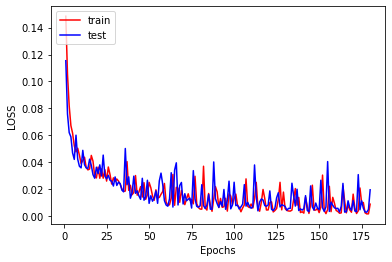

In [172]:
# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

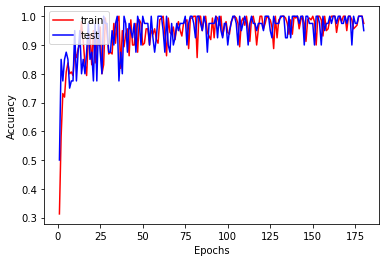

In [173]:
# plot accuracy
plt.plot(epochs, accuracy, 'r')
plt.plot(epochs, val_accuracy, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [200]:
#predict
predictions_targets = model.predict(input_validation)
predicted = label_encoder.inverse_transform(predictions_targets.argmax(1))

In [201]:
# target
targets_val = label_encoder.inverse_transform(np.array(target_validation.values).argmax(1))

In [202]:
# compare them
df = pd.DataFrame({'target':targets_val, 'predicted': predicted})
df

,target,predicted
0,5,5
1,1,1
2,0,0
3,3,3
4,1,1
5,5,5
6,5,5
7,4,4
8,0,0
9,4,4
